In [31]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from tools import *
from fit_funcs import *
from entropy import *
import costfun.costfun as cost
import utils.figures as fig_help
from RandomMatrixTheory import goe
import utils.tools as tools

import importlib as imp
def reload_modules():
    imp.reload(cost)
    imp.reload(fig_help)

import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}

%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

linestyle_ls = ['-','--',':', '-.']
linestyle = itertools.cycle(linestyle_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists

base_dir = "../results/PBC/"

print(base_dir[2:])
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}


# Driver Program
for L in range(14, 33, 1):    
    print(L, (Fibonacci(L-1) + Fibonacci(L+1))/L, (Fibonacci(L-1) + Fibonacci(L+1)))
    
np.sum( np.arange(18, 31) + 2 )

/Users/rafal.swietek/Projects/CODES/QHamSolver/GoldenChain/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
/results/PBC/
14 60.214285714285715 843
15 90.93333333333334 1364
16 137.9375 2207
17 210.05882352941177 3571
18 321.0 5778
19 492.05263157894734 9349
20 756.35 15127
21 1165.5238095238096 24476
22 1800.1363636363637 39603
23 2786.0434782608695 64079
24 4320.083333333333 103682
25 6710.44 167761
26 10440.115384615385 271443
27 16266.814814814816 439204
28 25380.25 710647
29 39650.03448275862 1149851
30 62016.6 18604

338

## TESTS

In [17]:
Stot = []
L = 18
J=1
# for ks in range(L/2)
# name = '../' + 'fullspectrum_L=%d,J=%g,c=%g.hdf5'%(L,J,c)


2217.0

In [43]:

L=12

J=1
c=0.0

for L in [12]:
  for c in [0.1]:
    name = '../' + 'fullspectrum_L=%d,J=%g,c=%g.hdf5'%(L,J,c)
    if exists(name):
        with h5py.File(name, "r") as file:
            E = np.array(file.get('energies')[0])
            print(E.size)
    E_marton = []
    import csv
    with open('/Users/rafal.swietek/Downloads/DATA_FROM _MARTON/golden_chain/eig_L%d_c%.1f_MachinePrecision.csv'%(L,c), mode ='r') as file:
      csvFile = csv.reader(file)
      for lines in csvFile:
        # print(lines)
        En = float(lines[0])
        deg = float(lines[1])
        # if deg > 1: print(deg)
        for i in range(int(deg)):
            E_marton.append(En)
            
    E_marton = np.sort(np.array(E_marton))
    print(E_marton.size)
    x = E - E_marton

    print(x[np.abs(x) > 1e-15])



322
322
[ 3.55271368e-15  2.30926389e-14  1.42108547e-14 -1.24344979e-14
  1.77635684e-15 -2.13162821e-14 -1.06581410e-14  1.77635684e-15
  5.32907052e-15  6.21724894e-15  6.21724894e-15 -1.77635684e-15
  8.88178420e-15  7.10542736e-15 -7.10542736e-15 -1.42108547e-14
 -7.10542736e-15  1.33226763e-14 -1.24344979e-14 -9.76996262e-15
  3.55271368e-15 -5.32907052e-15 -2.13162821e-14 -1.15463195e-14
 -1.86517468e-14 -2.22044605e-14 -4.44089210e-15 -3.55271368e-15
  1.77635684e-15  1.06581410e-14  9.76996262e-15  4.44089210e-15
 -2.66453526e-15  5.32907052e-15  7.99360578e-15 -7.10542736e-15
 -6.21724894e-15 -3.55271368e-15 -1.24344979e-14 -7.10542736e-15
  7.99360578e-15  5.32907052e-15  7.10542736e-15 -7.10542736e-15
  3.01980663e-14 -2.66453526e-15 -3.55271368e-15 -1.77635684e-15
 -6.21724894e-15  7.99360578e-15 -8.88178420e-15 -1.77635684e-14
 -9.76996262e-15 -1.77635684e-15 -9.76996262e-15  1.77635684e-15
 -1.68753900e-14  1.77635684e-15 -6.21724894e-15 -2.66453526e-15
  8.88178420e-15 

In [13]:

L=12

J=0.55
c=0.0

for L in [12]:
    
    E_marton = np.zeros((3, 322))
    for ii, c in enumerate([0.1]):
        import csv
        x = []
        with open('/Users/rafal.swietek/Downloads/DATA_FROM _MARTON/golden_chain/eig_L%d_c%.1f_MachinePrecision.csv'%(L,c), mode ='r') as file:
            csvFile = csv.reader(file)
            for lines in csvFile:
                # print(lines)
                En = float(lines[0])
                deg = float(lines[1])
                # if deg > 1: print(deg)
                for i in range(int(deg)):
                    x.append(En)
                    
            x = np.sort(np.array(x))
            print(x.size)
            E_marton[ii] = x
            # x = E - E_marton
            # print(x[np.abs(x) > 1e-14])
    for jj in range(322):
        print(E_marton[0,jj], E_marton[1,jj], E_marton[2,jj], "\t", E_marton[2,jj] - E_marton[0,jj], "\t", E_marton[1,jj] - E_marton[0,jj])


322
-9.223157333335003 0.0 0.0 	 9.223157333335003 	 9.223157333335003
-9.150606947217737 0.0 0.0 	 9.150606947217737 	 9.150606947217737
-9.032218250062442 0.0 0.0 	 9.032218250062442 	 9.032218250062442
-8.376916883428551 0.0 0.0 	 8.376916883428551 	 8.376916883428551
-8.371173483414804 0.0 0.0 	 8.371173483414804 	 8.371173483414804
-8.271380218907197 0.0 0.0 	 8.271380218907197 	 8.271380218907197
-8.109381320649682 0.0 0.0 	 8.109381320649682 	 8.109381320649682
-8.082799975463576 0.0 0.0 	 8.082799975463576 	 8.082799975463576
-7.994732065557003 0.0 0.0 	 7.994732065557003 	 7.994732065557003
-7.716311986700407 0.0 0.0 	 7.716311986700407 	 7.716311986700407
-7.700120502060531 0.0 0.0 	 7.700120502060531 	 7.700120502060531
-7.65235466380341 0.0 0.0 	 7.65235466380341 	 7.65235466380341
-7.617949361596558 0.0 0.0 	 7.617949361596558 	 7.617949361596558
-7.617423300864824 0.0 0.0 	 7.617423300864824 	 7.617423300864824
-7.4405998678963545 0.0 0.0 	 7.4405998678963545 	 7.44059986

### TEST HAMILTONIAN (SYMPY)

In [32]:
from sympy import init_session 
# init_session()

In [39]:
from sympy import Matrix, var
from sympy.physics.quantum import TensorProduct as tens
from sympy.physics.quantum.dagger import Dagger as dag
from sympy import Symbol, simplify, exp, log, pi
from sympy import Sum
from sympy import I
from sympy import solve
from sympy import zeros
from sympy import Rational
import sympy

fi = Symbol('varphi', real=True)
c = Symbol('c', real=True)
# fi = (1 + np.sqrt(5)) / 2.
# c = 0.5

P = Matrix([[0, 0], [0, 1]])
N = Matrix([[1, 0], [0, 0]])

e = Matrix([[1, 0], [0, 1]])
X = Matrix([[0, 1], [1, 0]])
Y = Matrix([[0, -I], [I, 0]])
Z = Matrix([[1, 0], [0, -1]])

h1 = - fi**(-3/2) * tens(P, X, P, e, e, e) - fi**(-1) * tens(P, P, P, e, e, e) - fi**(-2) * tens(P, N, P, e, e, e) - tens(N, P, N, e, e, e)
h2 = - fi**(-3/2) * tens(e, P, X, P, e, e) - fi**(-1) * tens(e, P, P, P, e, e) - fi**(-2) * tens(e, P, N, P, e, e) - tens(e, N, P, N, e, e)
h3 = - fi**(-3/2) * tens(e, e, P, X, P, e) - fi**(-1) * tens(e, e, P, P, P, e) - fi**(-2) * tens(e, e, P, N, P, e) - tens(e, e, N, P, N, e)
h4 = - fi**(-3/2) * tens(e, e, e, P, X, P) - fi**(-1) * tens(e, e, e, P, P, P) - fi**(-2) * tens(e, e, e, P, N, P) - tens(e, e, e, N, P, N)
h5 = - fi**(-3/2) * tens(P, e, e, e, P, X) - fi**(-1) * tens(P, e, e, e, P, P) - fi**(-2) * tens(P, e, e, e, P, N) - tens(N, e, e, e, N, P)
h6 = - fi**(-3/2) * tens(X, P, e, e, e, P) - fi**(-1) * tens(P, P, e, e, e, P) - fi**(-2) * tens(N, P, e, e, e, P) - tens(P, N, e, e, e, N)

H = h1 + h2 + h3 + h4 + h5 + h6
Q4 = h1*h2 - h2*h1 + h2*h3 - h3*h2 + h3*h4 - h4*h3 + h4*h5 - h5*h4 + h5*h6 - h6*h5 + h6*h1 - h1*h6
H2 = H + c * Q4
H = H + I * c * Q4

q4_1 = fi**(-3) * ( tens(P, X*P, X, P, e, e) + tens(P, X, P*X, P, e, e) - tens(P, X, X, P, e, e)) - fi**(-3/2) * fi**(-1) * tens(P, X*Z, P, P, e, e) + fi**(-3/2) * tens(P, X*Z, P, N, e, e) + fi**(-3/2) * fi**(-1) * tens(P, P, X*Z, P, e, e) - fi**(-3/2) * tens(N, P, X*Z, P, e, e)
q4_2 = fi**(-3) * ( tens(e, P, X*P, X, P, e) + tens(e, P, X, P*X, P, e) - tens(e, P, X, X, P, e)) - fi**(-3/2) * fi**(-1) * tens(e, P, X*Z, P, P, e) + fi**(-3/2) * tens(e, P, X*Z, P, N, e) + fi**(-3/2) * fi**(-1) * tens(e, P, P, X*Z, P, e) - fi**(-3/2) * tens(e, N, P, X*Z, P, e)
q4_3 = fi**(-3) * ( tens(e, e, P, X*P, X, P) + tens(e, e, P, X, P*X, P) - tens(e, e, P, X, X, P)) - fi**(-3/2) * fi**(-1) * tens(e, e, P, X*Z, P, P) + fi**(-3/2) * tens(e, e, P, X*Z, P, N) + fi**(-3/2) * fi**(-1) * tens(e, e, P, P, X*Z, P) - fi**(-3/2) * tens(e, e, N, P, X*Z, P)
q4_4 = fi**(-3) * ( tens(P, e, e, P, X*P, X) + tens(P, e, e, P, X, P*X) - tens(P, e, e, P, X, X)) - fi**(-3/2) * fi**(-1) * tens(P, e, e, P, X*Z, P) + fi**(-3/2) * tens(N, e, e, P, X*Z, P) + fi**(-3/2) * fi**(-1) * tens(P, e, e, P, P, X*Z) - fi**(-3/2) * tens(P, e, e, N, P, X*Z)
q4_5 = fi**(-3) * ( tens(X, P, e, e, P, X*P) + tens(P*X, P, e, e, P, X) - tens(X, P, e, e, P, X)) - fi**(-3/2) * fi**(-1) * tens(P, P, e, e, P, X*Z) + fi**(-3/2) * tens(P, N, e, e, P, X*Z) + fi**(-3/2) * fi**(-1) * tens(X*Z, P, e, e, P, P) - fi**(-3/2) * tens(X*Z, P, e, e, N, P)
q4_6 = fi**(-3) * ( tens(X*P, X, P, e, e, P) + tens(X, P*X, P, e, e, P) - tens(X, X, P, e, e, P)) - fi**(-3/2) * fi**(-1) * tens(X*Z, P, P, e, e, P) + fi**(-3/2) * tens(X*Z, P, N, e, e, P) + fi**(-3/2) * fi**(-1) * tens(P, X*Z, P, e, e, P) - fi**(-3/2) * tens(P, X*Z, P, e, e, N)

Q4_2 = q4_1 + q4_2 + q4_3 + q4_4 + q4_5 + q4_6

T = np.zeros( (64, 64) )
R = np.zeros( (64, 64) )
for idx in range(64):
    idx2 = (idx - 32) * 2 + 1 if idx >= 32 else 2 * idx
    T[idx2, idx] = 1
    
    idx3 = idx
    idx2 = 0
    dummy = 6
    while(dummy>0):
        # print(bin(idx3))
        idx2 = (idx2 << 1) | (idx3 & 1)
        idx3 = idx3 >> 1
        dummy -= 1
    R[idx2, idx] = 1
T = Matrix(T)
R = Matrix(R)

(Q4 - Q4_2).subs(fi, (1 + np.sqrt(5)) / 2.)
# ( (H.subs(c: 0.5)).subs(fi: (1 + np.sqrt(5)) / 2.) ).eigenvals()
# H.subs(c, 0.5).subs(fi, (1 + np.sqrt(5)) / 2.).eigenvals()

Matrix([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0,

### REST

In [9]:
# H2.subs(c, 0.5).subs(fi, (1 + np.sqrt(5)) / 2.).eigenvals()

In [8]:
H

Matrix([
[0,  0,  0, 0,  0,                0, 0,              0,  0,  0,                0,                                                    0, 0,                                                     0,              0,                                                     0,  0,                0,  0,                                                     0,                0,                0,                                                    0,                                                     0, 0,                                                    0,                                                     0,                0,              0,                                                     0,                                                     0,                                                     0,  0, 0,                0,              0,  0,                                                    0,                                                     0,                                    

In [80]:
Q4 * R - R * Q4

Matrix([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,                 0, 0,                  0, 0,                 0, 0, 0, 0,                  0, 0, 0,                 0,                  0, 0,                 0,                  0,                  0, 0,                  0,                 0,                  0, 0, 0, 0, 0, 0,                 0,                  0,                 0, 0,                  0, 0,                  0,                 0,                  0,                  0,                  0, 0, 0,                 0,                 0,                  0,                  0,                  0,                  0, 0,                 0,                  0,                  0,                 0,                  0,                  0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,                 0, 0,                  0, 0,                 0, 0, 0, 0,                  0, 0, 0,                 0,                  0, 0,                 0,                  0,                  0, 0,            

In [79]:
T * H - H * T

Matrix([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,                    0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,                    0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,                    0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,                    0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [78]:
R * H - H * R

Matrix([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,                      0, 0,                     0, 0,                     0, 0, 0, 0,                     0, 0, 0,                      0,                      0, 0,                      0,                     0,                      0, 0,                      0,                     0,                      0, 0, 0, 0, 0, 0,                      0,                     0,                     0, 0,                     0, 0,                      0,                      0,                      0,                      0,                      0, 0, 0,                      0,                     0,                     0,                      0,                      0,                      0, 0,                     0,                      0,                      0,                     0,                      0,                      0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,                      0, 0,                     0, 0,                     0, 0, 0, 

In [1]:
H - dag(H)

NameError: name 'H' is not defined

## Entropy

18 0.0 0.391911739563003
20 0.0 0.3956940691809719
22 0.0 0.3808548314680117
24 0.0 0.38711825055543864


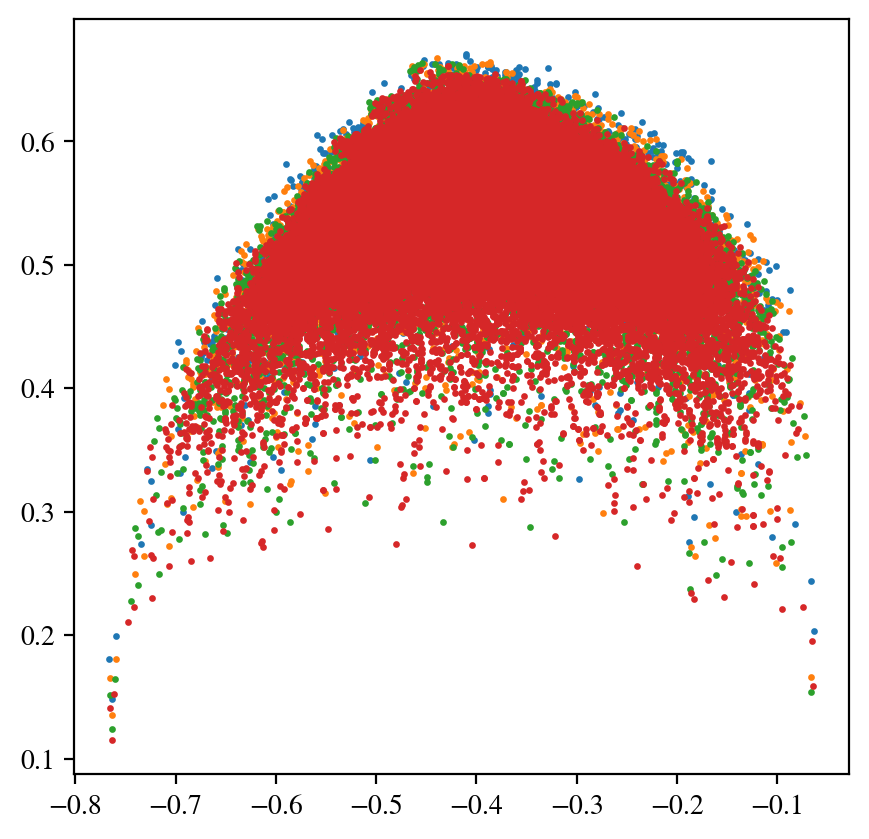

In [30]:
L=24
c=0.
J=1

sizes = np.arange(18, 26, 2)

psec = [-1, 1] if c == 0 else [1]

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200, sharex=True)
for L in sizes:
    ksec = np.arange(0, L//2+1, 1) if c == 0 else np.arange(0, L+1, 1)
    Etot = []
    Stot = []
    
    ratio = 0
    counter = 0
    for ks in ksec:
        psec = [-1, 1] if c == 0 and (ks == 0 or float(ks) == (L/2.0)) else [1]
        for ps in psec:
            name = base_dir + 'Entropy/Eigenstate/' + info(L, J, c, ks, ps, ext='.hdf5')
            if exists(name):
                with h5py.File(name, "r") as file:
                    E = np.array(file.get('energies')[0])
                    dim = E.size
                    E_av = np.mean(E)
                    index_meanE = min(range(len(E)), key=lambda i: abs(E[i] - E_av))
                    
                    num = dim//2
                    my_min = int(index_meanE - num / 2)
                    if num == dim or my_min < 0: my_min = 0;  

                    my_max = int(index_meanE + num / 2)
                    if num == dim or my_max >= dim: my_max = dim-1
                    
                    gaps = np.diff(E)
                    ratio += np.mean( np.minimum(gaps[:-1], gaps[1:]) / np.maximum(gaps[:-1], gaps[1:]) )
                    counter += 1
                    # print( np.mean(ratio) )
                    
                    Etot = [*Etot, *E]
                    
                    S = np.array(file.get('entropy')[-1])
                    Stot = [*Stot, *S]
                    # if c == 0 and ks > 0 and ks < L/2.0:
                    
            else:
                print(name)
    
    print(L, c, ratio / counter)
    Etot = np.array(Etot)
    Stot = np.array(Stot)
    
    indices = np.argsort(Etot)
    Etot = Etot[indices]
    Stot = Stot[indices]
    axis.scatter(Etot / L, Stot / page(L//2, L//2), label=r"$L=%d$"%L, s=2)